# 初期値の影響(ランダム値)
* 初期値は、バラついていた方がいいということわかったので、乱数によってバラつかせることを考える。
* ここでは、重みの初期を変化させた場合に、活性化関数通過後の値がどのように変化するかを実験してみる。
* 以下のシミュレーションでは、sigmoid関数を使っていることに注意!!!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、notebook/commonフォルダのactivations.pyを選択し、アップロードしてください')
    print('===========')
    files.upload()
    !mkdir common
    !mv *.py ./common
except:
    print('ローカル環境での実行です')

from common.activations import sigmoid
np.random.seed(1234)

Google Colab. 上での実行です
「ファイルを選択」から、notebook/commonフォルダのactivations.pyを選択し、アップロードしてください


Saving activations.py to activations.py


In [2]:
def simulation(num_in=100, num_x=1000, hidden_layer_size=5, num_node=100, sigma=1.0):
    """
    num_in : 入力層のノードの数
    num_x : 入力するデータの数
    hidden_layer_size : 中間層の層数
    num_node : 中間層のノード数
    sigma : 乱数を抽出する際に用いる正規分布の標準偏差
    """
    # num_in次元のデータをnum_x個つくる
    X = np.random.randn(num_x, num_in) # 標準正規分布からのサンプリング

    # 中間層ノードの出力値を格納するdict
    h = {}

    # 順伝播の計算
    for i in range(hidden_layer_size):
        if i==0:
            X_ = X
        else:
            X_ = h[i-1]

        # 重みの初期化
        W = np.random.randn(num_node, num_node) * sigma

        # 行列の積
        z = np.dot(X_, W)

        # シグモイド関数に入れる
        a = sigmoid(z)

        # dictに格納
        h[i] = a

    return h

def histgram(h, ymax = 50000):
    plt.figure(figsize=(14,4))
    fig_num = len(h)
    for key,value in h.items():
        plt.subplot(1,fig_num, key+1)
        plt.title("hiddlen_layer=%s"%(key+1))
        plt.hist(value.flatten())
        plt.ylim([0, ymax])
        plt.xlim([0, 1.0])
        if key!=0:
            plt.yticks([], [])
    plt.show()

## 標準偏差1.0の正規分布よりサンプリングした場合

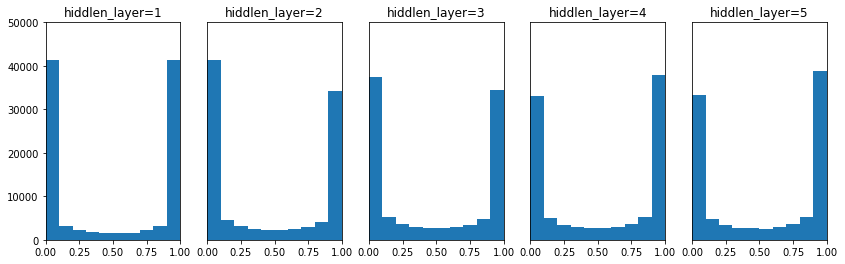

In [3]:
# 実験
h = simulation(sigma=1.0)

# 中間層ノードの出力値(アクティベーションとも呼ばれる)のヒストグラムを描く
histgram(h)

## 標準偏差0.25の正規分布よりサンプリングした場合

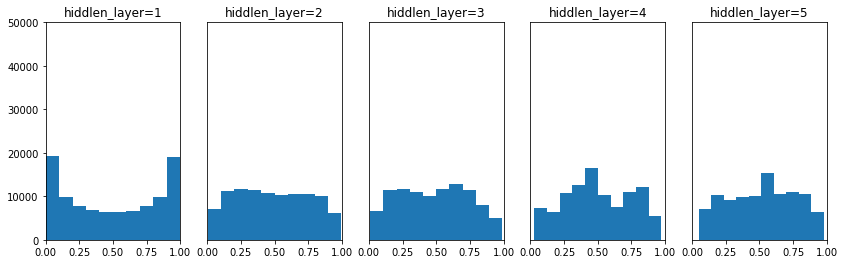

In [ ]:
# 実験
h = simulation(sigma=0.25)

# 中間層ノードの出力値(アクティベーションとも呼ばれる)のヒストグラムを描く
histgram(h)

## 標準偏差0.1の正規分布よりサンプリングした場合

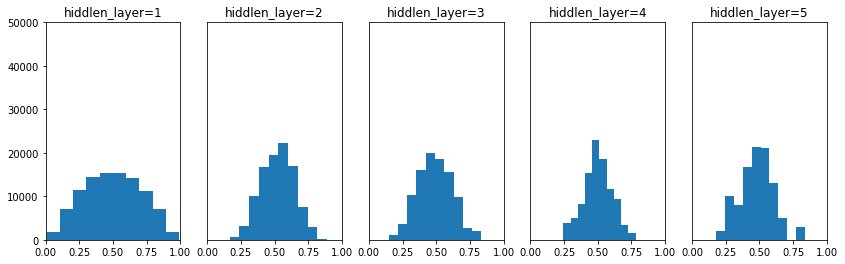

In [ ]:
# 実験
h = simulation(sigma=0.1)

# 中間層ノードの出力値(アクティベーションとも呼ばれる)のヒストグラムを描く
histgram(h)

## 標準偏差0.05の正規分布よりサンプリングした場合

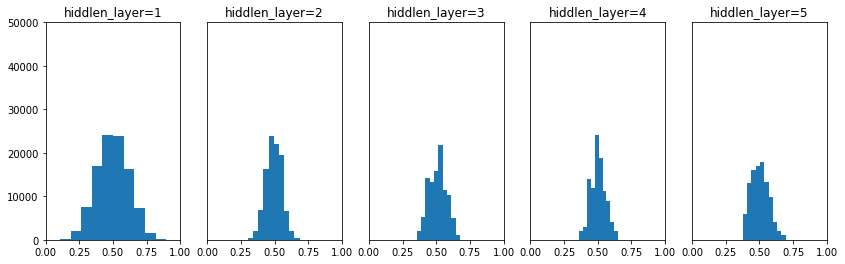

In [ ]:
# 実験
h = simulation(sigma=0.05)

# 中間層ノードの出力値(アクティベーションとも呼ばれる)のヒストグラムを描く
histgram(h)

## 標準偏差0.01の正規分布よりサンプリングした場合

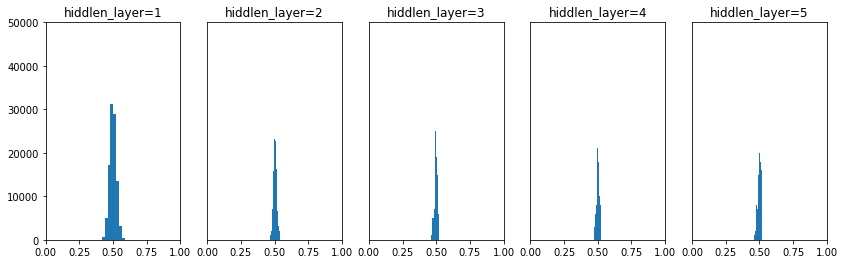

In [ ]:
# 実験
h = simulation(sigma=0.01)

# 中間層ノードの出力値(アクティベーションとも呼ばれる)のヒストグラムを描く
histgram(h)

### [問]
* 標準偏差1の場合、0と1に偏っている。なぜ、0と1に偏るのでしょうか？ 
* 標準偏差0.01の場合、0.5に集中している。なぜ、0.5に集中するのでしょうか？
* 最適な標準偏差はどのあたりでしょうか？

### [まとめ]
* シグモイド関数の出力が0または1に近づくということは、微分の値が0に近づくということ。こうなると、誤差逆伝播計算において、勾配の値がどんどん消えていってしまう。これを勾配消失問題という。
* 逆に、シグモイド関数の出力が、ある値に集中してしまうということは、ノードの多様性がなくなるということ。沢山のノードを配置する意義がなくなってしまう。
* よって、重みの初期値は、適度にバラついているのがいいということになる。